In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [6]:
# Create list of all targets (minus background noise)
dataset_path = '/home/spixy/Downloads/Dataset_1/'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
all_targets.remove('_background_noise_')
print(all_targets)

['off', 'nine', 'five', 'up', 'tree', 'on', 'right', 'four', 'seven', 'bird', 'yes', 'two', 'house', 'go', 'three', 'dog', 'stop', 'no', 'wow', 'marvin', 'down', 'sheila', 'cat', 'left', 'six', 'bed', 'eight', 'happy', 'zero', 'one']


In [7]:
# Settings
feature_sets_path = '/home/spixy/Downloads/tflite-speech-recognition-master/'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = '/wake_words_model'
wake_words = ['stop','yes','no','on','off','sheila', 'other']

In [8]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [9]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [10]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(11601, 16, 16)
(1456, 16, 16)
(1458, 16, 16)


In [11]:
# Peek at labels
for x, label in zip(range(len(y_test)), y_test):
    print(x, label)

0 5.0
1 17.0
2 21.0
3 17.0
4 21.0
5 0.0
6 10.0
7 0.0
8 0.0
9 8.0
10 28.0
11 23.0
12 17.0
13 20.0
14 21.0
15 16.0
16 10.0
17 16.0
18 5.0
19 10.0
20 21.0
21 5.0
22 21.0
23 5.0
24 16.0
25 17.0
26 2.0
27 4.0
28 10.0
29 5.0
30 10.0
31 21.0
32 16.0
33 10.0
34 21.0
35 3.0
36 17.0
37 5.0
38 5.0
39 0.0
40 17.0
41 0.0
42 5.0
43 0.0
44 5.0
45 17.0
46 10.0
47 16.0
48 10.0
49 23.0
50 5.0
51 0.0
52 5.0
53 5.0
54 5.0
55 5.0
56 10.0
57 24.0
58 16.0
59 4.0
60 16.0
61 17.0
62 16.0
63 16.0
64 15.0
65 17.0
66 21.0
67 5.0
68 16.0
69 9.0
70 17.0
71 10.0
72 16.0
73 17.0
74 0.0
75 16.0
76 5.0
77 10.0
78 17.0
79 16.0
80 16.0
81 21.0
82 10.0
83 5.0
84 16.0
85 17.0
86 1.0
87 8.0
88 17.0
89 10.0
90 5.0
91 17.0
92 5.0
93 5.0
94 0.0
95 16.0
96 8.0
97 10.0
98 10.0
99 17.0
100 5.0
101 16.0
102 0.0
103 5.0
104 0.0
105 16.0
106 21.0
107 5.0
108 10.0
109 10.0
110 16.0
111 0.0
112 16.0
113 5.0
114 21.0
115 0.0
116 14.0
117 16.0
118 14.0
119 1.0
120 13.0
121 18.0
122 16.0
123 0.0
124 17.0
125 21.0
126 10.0
127 10.0
128 17

1161 0.0
1162 24.0
1163 19.0
1164 17.0
1165 10.0
1166 16.0
1167 21.0
1168 16.0
1169 21.0
1170 17.0
1171 5.0
1172 0.0
1173 20.0
1174 21.0
1175 16.0
1176 6.0
1177 21.0
1178 0.0
1179 5.0
1180 5.0
1181 17.0
1182 16.0
1183 16.0
1184 16.0
1185 8.0
1186 5.0
1187 17.0
1188 18.0
1189 27.0
1190 22.0
1191 0.0
1192 0.0
1193 10.0
1194 15.0
1195 16.0
1196 16.0
1197 16.0
1198 16.0
1199 5.0
1200 16.0
1201 21.0
1202 0.0
1203 0.0
1204 21.0
1205 16.0
1206 16.0
1207 16.0
1208 0.0
1209 5.0
1210 0.0
1211 0.0
1212 16.0
1213 10.0
1214 5.0
1215 5.0
1216 0.0
1217 17.0
1218 10.0
1219 16.0
1220 6.0
1221 10.0
1222 5.0
1223 0.0
1224 17.0
1225 10.0
1226 0.0
1227 0.0
1228 5.0
1229 0.0
1230 8.0
1231 10.0
1232 10.0
1233 28.0
1234 10.0
1235 21.0
1236 1.0
1237 0.0
1238 10.0
1239 10.0
1240 3.0
1241 16.0
1242 16.0
1243 29.0
1244 7.0
1245 5.0
1246 21.0
1247 19.0
1248 16.0
1249 21.0
1250 0.0
1251 16.0
1252 16.0
1253 21.0
1254 16.0
1255 5.0
1256 16.0
1257 5.0
1258 17.0
1259 17.0
1260 16.0
1261 17.0
1262 10.0
1263 10.0
1264 5.

In [12]:
for i in range(len(y_train)):
    for wake_word in wake_words[:-1]:
        if all_targets.index(wake_word) == int(y_train[i]):
            y_train[i] = wake_words.index(wake_word) + 100
for i in range(len(y_train)):
    if y_train[i] < 100:
        y_train[i] = wake_words.index('other')
    else:
        y_train[i] -= 100
        
for i in range(len(y_val)):
    for wake_word in wake_words[:-1]:
        if all_targets.index(wake_word) == int(y_val[i]):
            y_val[i] = wake_words.index(wake_word) + 100
for i in range(len(y_val)):
    if y_val[i] < 100:
        y_val[i] = wake_words.index('other')
    else:
        y_val[i] -= 100
        
for i in range(len(y_test)):
    for wake_word in wake_words[:-1]:
        if all_targets.index(wake_word) == int(y_test[i]):
            y_test[i] = wake_words.index(wake_word) + 100
for i in range(len(y_test)):
    if y_test[i] < 100:
        y_test[i] = wake_words.index('other')
    else:
        y_test[i] -= 100


In [13]:
# Peek at labels after conversion
for x, label in zip(range(len(y_test)), y_test):
    print(x, label)

0 3.0
1 2.0
2 5.0
3 2.0
4 5.0
5 4.0
6 1.0
7 4.0
8 4.0
9 6.0
10 6.0
11 6.0
12 2.0
13 6.0
14 5.0
15 0.0
16 1.0
17 0.0
18 3.0
19 1.0
20 5.0
21 3.0
22 5.0
23 3.0
24 0.0
25 2.0
26 6.0
27 6.0
28 1.0
29 3.0
30 1.0
31 5.0
32 0.0
33 1.0
34 5.0
35 6.0
36 2.0
37 3.0
38 3.0
39 4.0
40 2.0
41 4.0
42 3.0
43 4.0
44 3.0
45 2.0
46 1.0
47 0.0
48 1.0
49 6.0
50 3.0
51 4.0
52 3.0
53 3.0
54 3.0
55 3.0
56 1.0
57 6.0
58 0.0
59 6.0
60 0.0
61 2.0
62 0.0
63 0.0
64 6.0
65 2.0
66 5.0
67 3.0
68 0.0
69 6.0
70 2.0
71 1.0
72 0.0
73 2.0
74 4.0
75 0.0
76 3.0
77 1.0
78 2.0
79 0.0
80 0.0
81 5.0
82 1.0
83 3.0
84 0.0
85 2.0
86 6.0
87 6.0
88 2.0
89 1.0
90 3.0
91 2.0
92 3.0
93 3.0
94 4.0
95 0.0
96 6.0
97 1.0
98 1.0
99 2.0
100 3.0
101 0.0
102 4.0
103 3.0
104 4.0
105 0.0
106 5.0
107 3.0
108 1.0
109 1.0
110 0.0
111 4.0
112 0.0
113 3.0
114 5.0
115 4.0
116 6.0
117 0.0
118 6.0
119 6.0
120 6.0
121 6.0
122 0.0
123 4.0
124 2.0
125 5.0
126 1.0
127 1.0
128 2.0
129 0.0
130 3.0
131 1.0
132 2.0
133 6.0
134 5.0
135 1.0
136 6.0
137 2.0
138 6.

In [14]:
# What percentage of 'stop' appear in validation labels
print(sum(y_val) / len(y_val))
print(1 - sum(y_val) / len(y_val))

2.8839285714285716
-1.8839285714285716


In [15]:
# View the dimensions of our input data
print(x_train.shape)

(11601, 16, 16)


In [16]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(11601, 16, 16, 1)
(1456, 16, 16, 1)
(1458, 16, 16, 1)


In [17]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 16, 1)


In [18]:
# Build model
# Based on: https://www.geeksforgeeks.org/python-image-classification-using-keras/
model = models.Sequential()
model.add(layers.Conv2D(32, 
                        (2, 2), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [19]:
# Display model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 15, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [20]:
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

In [21]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Train on 11601 samples, validate on 1456 samples
Epoch 1/30
11601/11601 [==============================] - 1s 117us/sample - loss: 1.8148 - acc: 0.2933 - val_loss: 1.3535 - val_acc: 0.5007
Epoch 2/30
11601/11601 [==============================] - 1s 93us/sample - loss: 1.2553 - acc: 0.5402 - val_loss: 0.9409 - val_acc: 0.6738
Epoch 3/30
11601/11601 [==============================] - 1s 112us/sample - loss: 0.9907 - acc: 0.6456 - val_loss: 0.7769 - val_acc: 0.7143
Epoch 4/30
11601/11601 [==============================] - 1s 100us/sample - loss: 0.8504 - acc: 0.6980 - val_loss: 0.7001 - val_acc: 0.7424
Epoch 5/30
11601/11601 [==============================] - 1s 92us/sample - loss: 0.7657 - acc: 0.7311 - val_loss: 0.6616 - val_acc: 0.7562
Epoch 6/30
11601/11601 [==============================] - 1s 93us/sample - loss: 0.7112 - acc: 0.7526 - val_loss: 0.6284 - val_acc: 0.7720
Epoch 7/30
11601/11601 [==============================] - 1s 94us/sample - loss: 0.6853 - acc: 0.7569 - val_loss: 

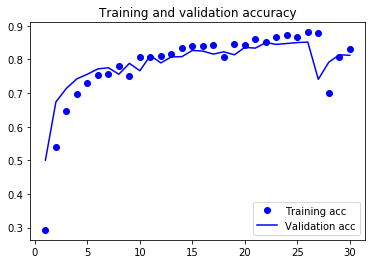

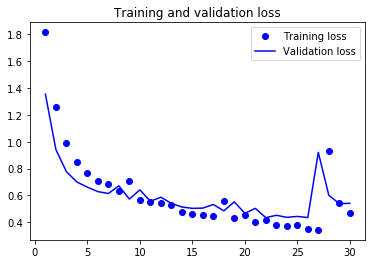

In [22]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
# Save the model as a file
import os
import tensorflow as tf
filepath = os.getcwd()+model_filename
tf.keras.models.save_model(
    model, filepath, overwrite=True, include_optimizer=True, save_format=tf,
    signatures=None)

In [32]:
# TEST: Load model and run it against test set
model = models.load_model(os.getcwd()+model_filename)
for i in range(100, 110):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 3.0  Prediction: [[1.1195691e-03 2.7162491e-06 2.2380822e-05 9.3033415e-01 4.1175503e-02
  1.6173489e-07 2.7345598e-02]]
Answer: 0.0  Prediction: [[0.7407278  0.00604245 0.07944456 0.00404697 0.01257261 0.00534172
  0.15182385]]
Answer: 4.0  Prediction: [[2.8776683e-02 9.6820231e-06 2.6118863e-05 2.3210403e-03 9.6328759e-01
  7.8277299e-07 5.5781147e-03]]
Answer: 3.0  Prediction: [[3.6863566e-04 2.5954671e-06 1.3628417e-04 9.7615880e-01 5.8912165e-03
  1.7123265e-06 1.7440772e-02]]
Answer: 4.0  Prediction: [[0.51508534 0.04847984 0.10752207 0.05854069 0.09298757 0.02396234
  0.15342216]]
Answer: 0.0  Prediction: [[9.9823207e-01 2.2350250e-07 1.5584543e-06 7.2938624e-06 2.2384233e-05
  1.0050436e-06 1.7355392e-03]]
Answer: 5.0  Prediction: [[0.19740655 0.19190271 0.13682154 0.16932428 0.12995957 0.03009678
  0.14448853]]
Answer: 3.0  Prediction: [[0.8245782  0.00380213 0.01434679 0.01098037 0.01552549 0.01074412
  0.12002288]]
Answer: 1.0  Prediction: [[4.9104815e-10 9.9985683e-

In [33]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

1458/1458 [==============================] - 0s 179us/sample - loss: 0.4887 - acc: 0.8189


[0.4886761498222299, 0.81893003]